In [ ]:
# Press Esc then m on a cell to put in text format

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np
import sklearn
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris

myiris = load_iris()
samples = myiris.data
print(samples)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [3]:
model = KMeans(n_clusters=3)
model.fit(samples)
labels = model.predict(samples)

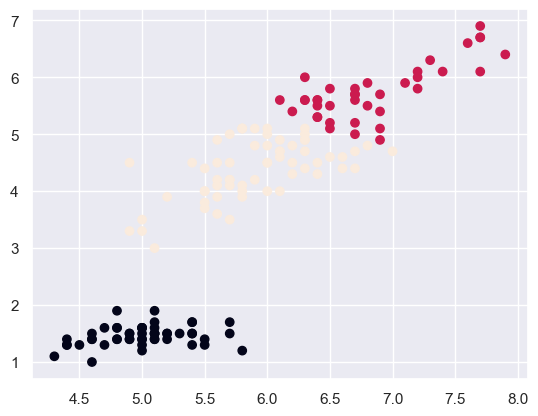

In [5]:
xs = samples[:,0]
ys = samples[:, 2]
plt.scatter(xs,ys,c=labels)
plt.show()

In [ ]:
#Exercise after Video 1

# Import KMeans
from sklearn.cluster import KMeans

# Create a KMeans instance with 3 clusters: model
model = KMeans(n_clusters=3)

# Fit model to points
model.fit(points)

# Determine the cluster labels of new_points: labels
labels = model.predict(new_points)

# Print cluster labels of new_points
print(labels)
# Import pyplot
import matplotlib.pyplot as plt

# Assign the columns of new_points: xs and ys
xs = new_points[:,0]
ys = new_points[:,1]

# Make a scatter plot of xs and ys, using labels to define the colors
plt.scatter(xs,ys,c=labels,alpha=0.5)

# Assign the cluster centers: centroids
centroids = model.cluster_centers_

# Assign the columns of centroids: centroids_x, centroids_y
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]

# Make a scatter plot of centroids_x and centroids_y
plt.scatter(centroids_x,centroids_y,marker='D',s=50)
plt.show()


# Video 2: How many Clusters to choose.

#### Inertia: Distance from each sample to centroid of its cluster. (model.inertia), the lower the better
##### - A good clustering has tight clusters(so low inertia), but not too many clusters.
##### - Choose an "elbow" in the inertia plot, where inertia begins to decrease more slowly


In [7]:
print(model.inertia_)

78.851441426146


In [ ]:
# Exercise 1:
ks = range(1, 6)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(samples)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

#Exercise 2
# Create a KMeans model with 3 clusters: model
model = KMeans(n_clusters=3)

# Use fit_predict to fit model and obtain cluster labels: labels
labels = model.fit_predict(samples)

# Create a DataFrame with labels and varieties as columns: df
df = pd.DataFrame({'labels': labels, 'varieties': varieties})

# Create crosstab: ct
ct = pd.crosstab(df['labels'], df['varieties'])

# Display ct
print(ct)


In [8]:
# Video 3: Transforming features for better clustering

##### - When Crosstab result not looking good: Might mean different feature variances(Spread of values)

##### - Feature Variance = Feature influence

##### - StandardScaler tranforms each feature to have mean 0 and vairance 1(Standardize each features)

##### - Normalizer() scales data to a range between 0 and 1 (or -1 to 1 for negative values)

##### - Use fit()/transform() with StandardScaler, fit()/predict() with KMeans

##### - Use sklearn pipeline to flow from standardscaler(first) then to KMeans.

In [ ]:
#Standaradize method
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(samples)
StandardScaler(copy=True, with_mean=True, with_std=True)
samples_scaled = scaler.transform(samples)

# Exercise 1: Scaling fish data for clustering
# You are given an array samples giving measurements of fish. Each row represents an individual fish. The measurements, 
# such as weight in grams, length in centimeters, and the percentage ratio of height to length, have very different scales. 
# In order to cluster this data effectively, you'll need to standardize these features first. 
# In this exercise, you'll build a pipeline to standardize and cluster the data.

#Pipelines combine multiple steps
scaler = StandardScaler()
kmeans = KMeans(n_clusters=3)
from sklearn.pipeline import make_pipeline
pipeline = make_pipeline(scaler, kmeans)

# Exercise 2: Clustering the fish data
# You'll now use your standardization and clustering pipeline from the previous exercise to cluster the fish by their measurements, 
# and then create a cross-tabulation to compare the cluster labels with the fish species.

# As before, samples is the 2D array of fish measurements. Your pipeline is available as pipeline, 
# and the species of every fish sample is given by the list species.

# Fit the pipeline to samples
pipeline.fit(samples)

# Calculate the cluster labels: labels
labels = pipeline.predict(samples)

# Create a DataFrame with labels and species as columns: df
df = pd.DataFrame({'labels': labels, 'species': species})

# Create crosstab: ct
ct = pd.crosstab(df['labels'], df['species'])

# Display ct
print(ct)

#Exercise 3: Cluster stocks(Normalizer)
#In this exercise, you'll cluster companies using their daily stock price movements 
#(i.e. the dollar difference between the closing and opening prices for each trading day). 
#You are given a NumPy array movements of daily price movements from 2010 to 2015 (obtained from Yahoo! Finance), 
#where each row corresponds to a company, and each column corresponds to a trading day.

#Some stocks are more expensive than others. To account for this, include a Normalizer at the beginning of your pipeline. 
#The Normalizer will separately transform each company's stock price to a relative scale before the clustering begins.

# Import Normalizer
from sklearn.preprocessing import Normalizer

# Create a normalizer: normalizer
normalizer = Normalizer()

# Create a KMeans model with 10 clusters: kmeans
kmeans = KMeans(n_clusters=10)

# Make a pipeline chaining normalizer and kmeans: pipeline
pipeline = make_pipeline(normalizer, kmeans)

# Fit pipeline to the daily price movements
pipeline.fit(movements)

#Exercise 4: Which stocks move together?
# In the previous exercise, you clustered companies by their daily stock price movements. 
# So which company have stock prices that tend to change in the same way? 
# You'll now inspect the cluster labels from your clustering to find out.

# Predict the cluster labels: labels
labels = pipeline.predict(movements)

# Create a DataFrame aligning labels and companies: df
df = pd.DataFrame({'labels': labels, 'companies': companies})

# Display df sorted by cluster label
print(df.sort_values('labels'))